## Problem 2: Descriptive Statistics and Probability Theory: Silated Data

It is obvious that the descriptive tools are very sensitive to contamination or outliers in the data. The objective of this problem is to assess the sensitivity of these measures/tools to outliers or very heterogenous data.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sns
mpl.rcParams['figure.figsize'] = (10, 3)
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

from utils import *

%load_ext autoreload
%autoreload 2

# 1

- [x] Simulate (with a ﬁxed seed) a sample of size $n = 100$ from the normal distribution with $µ_1 = 10$ and $\sigma^2_1 = 9$.

In [3]:
np.random.seed(0)

n = 100
mu1 = 10
sigma1 = 3

rv_norm = stats.norm(loc=mu1, scale=sigma1)
sample_norm1 = rv_norm.rvs(size=n)
print('N({},{}) | Sample: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}...'\
      .format(mu1, sigma1**2, *sample_norm1))

N(10,9) | Sample: 15.29 11.20 12.94 16.72 15.60...


## 1.a

- [x] Plot the histogram and compare it to the density of $N(10, 9)$.

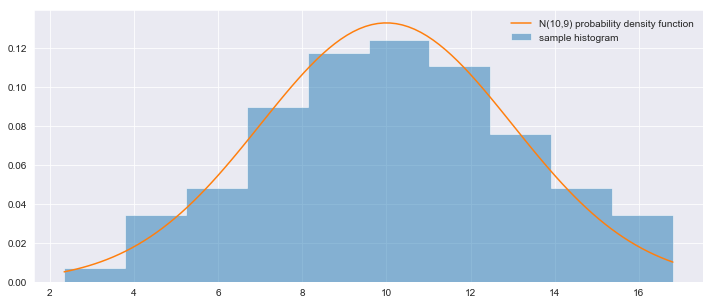

In [4]:
mpl.rcParams['figure.figsize'] = (12, 5)
xs = np.linspace(sample_norm1.min(), sample_norm1.max(), 100)
ys = rv_norm.pdf(xs)

plt.hist(sample_norm1, bins='sqrt', density=True, histtype='stepfilled',
         alpha=0.5, label='sample histogram')
plt.plot(xs, ys, label='N(10,9) probability density function')
plt.legend(loc='best', frameon=False)
plt.show()

## 1.b

- [x] Now draw a sample $y_i$ of size $n = 100$ from $t_5$. Transform it as follows: $10 + 3\sqrt{3/5} \cdot y_i$ .
- [x] Plot the histogram and compare the density of $N(10, 9)$.
- [x] What can be concluded and why this example might be relevant for empirical studies?

> We can conclude that we may approximate Normal distribution using Student distribution. Indeed, if $X \sim N(a,\sigma^2)$ so $EX=a$ & $Var(X)=\sigma^2$, and $Y \sim t_n$ which means that $EY=0$ & $Var(Y)=\frac{n}{n-2}$ then we can approximate:

>\begin{equation}
X \approx \sigma_X\left( \frac{Y - EY}{\sigma_Y} \right) + EX = \sigma_X \sqrt{\frac{n-2}{n}} Y  + a
\end{equation}
> In our case $n = 5$, $EX=10$, $\sigma_X=3$ therefore $X \approx 3 \sqrt{\frac{3}{5}} Y + 10$

> This example reveals the closeness of Normal and Student distributions. Therefore many different empirical studies that conclude with the normal distribution of one or anothet variable may be wrong although we would never know the truth. Anyway the t-distribution might also be considered.

Student_5 | Sample: 1.66 -1.64 1.08 1.63 0.78...
Transformed sample: 13.87 6.19 12.50 13.79 11.82...


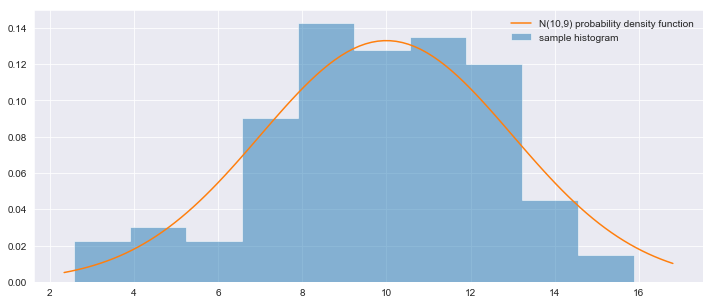

In [5]:
mpl.rcParams['figure.figsize'] = (12, 5)
np.random.seed(0)
df=5
rv_st = stats.t(df=df)
sample_st = rv_st.rvs(size=100)
sample_st_transformed = 10 + 3 * np.sqrt(3/5) * sample_st
print('Student_{} | Sample: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}...'\
      .format(df, *sample_st))
print('Transformed sample: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}...'\
      .format(*sample_st_transformed))
plt.hist(sample_st_transformed, bins='sqrt', density=True,
         histtype='stepfilled', alpha=0.5, label='sample histogram')
plt.plot(xs, ys, label='N(10,9) probability density function')
plt.legend(loc='best', frameon=False)
plt.show()

# 2
In practice the data is always very heterogenous. To reﬂect it we contaminate the data by adding an outlier or a subsample with diﬀerent characteristics.

## 2.a

- [x] To obtain a realistic heterogenous sample add to the original normal data a new sample of size $m$ simulated from $N(20, 2^2)$, i.e. $µ_2 = 20$ and $\sigma^2_2 = 4$. The size $m$ will obviously inﬂuence the above measures.
- [x] Vary $m$ from 10 to 200. (The resulting sample is said to stem from a mixture normal distribution).

In [6]:
delta_m = 5
ms = np.arange(0, 200 + delta_m, delta_m)
print('m values are: {} {} ... {} {}.'.format(*ms[:2], *ms[-2:]))
mu2 = 20
sigma2 = 2

rv_norm2 = stats.norm(loc=mu2, scale=sigma2)
samples_norm2 = {}
samples_h = {}
sample_norm2 = rv_norm2.rvs(size=ms[-1])
for m in ms:
#     samples_norm2[m] = rv_norm2.rvs(size=m)
    samples_norm2[m] = sample_norm2[:m]
    samples_h[m] = np.hstack((sample_norm1, samples_norm2[m]))
print('Generated {} samples for different m values'.format(len(ms)))

m values are: 0 5 ... 195 200.
Generated 41 samples for different m values


## 2.b

- [x] Plot Box-plots (or `violin` plots) and histograms for each subsample individually and for the sample for a few diﬀerent values of $m$.

FIRST SUBSAMPLE from N(10,9)
(number of observations: 100)


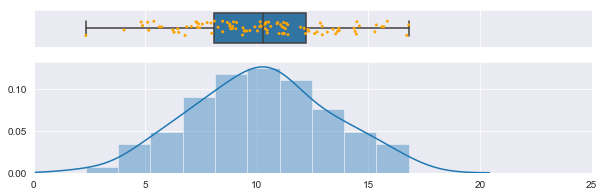

SECOND SUBSAMPLE from N(20,4); m = 10
(number of observations: 10)


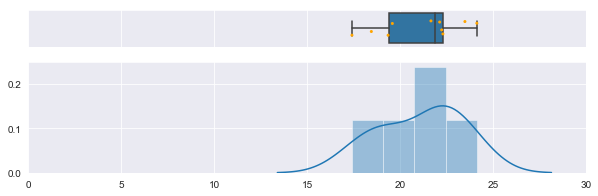

TOTAL SAMPLE
(number of observations: 110)


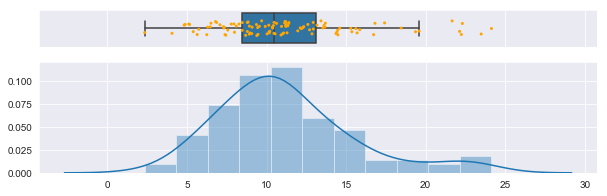

SECOND SUBSAMPLE from N(20,4); m = 60
(number of observations: 60)


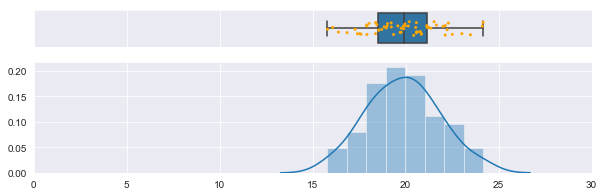

TOTAL SAMPLE
(number of observations: 160)


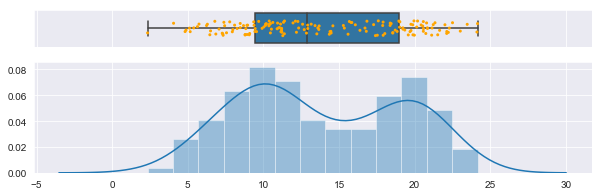

SECOND SUBSAMPLE from N(20,4); m = 120
(number of observations: 120)


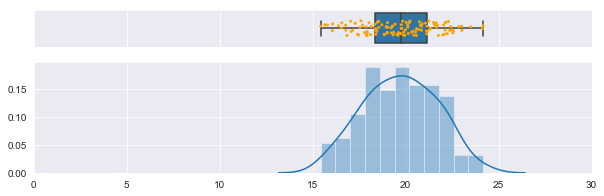

TOTAL SAMPLE
(number of observations: 220)


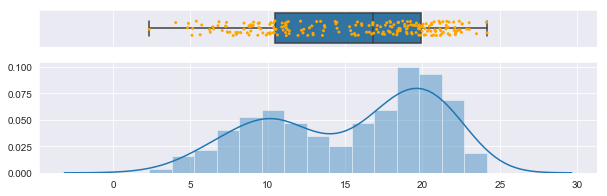

SECOND SUBSAMPLE from N(20,4); m = 200
(number of observations: 200)


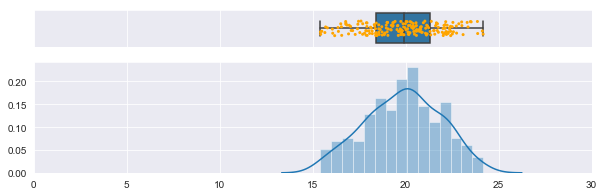

TOTAL SAMPLE
(number of observations: 300)


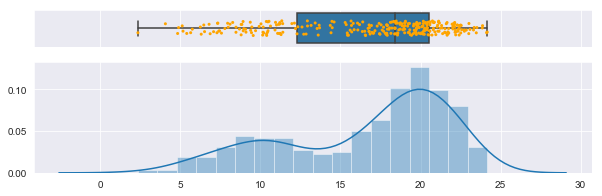

In [7]:
print('FIRST SUBSAMPLE from N({},{})'.format(mu1, sigma1**2))
represent_distribution(sample_norm1, 0, 25)
for m in [10,60,120,200]:
    print('========================================================================')
    print('SECOND SUBSAMPLE from N({},{}); m = {}'.format(mu2, sigma2**2, m))
    represent_distribution(samples_norm2[m], 0, 30)
    print('TOTAL SAMPLE')
    represent_distribution(samples_h[m])

## 2.c

- [x] Make animated or interactive graphics (with `manipulate`, `plotly`, `ggplot`, etc.) to visualize the impact of $m$ on the histogram and location measures (added as vertical lines in the graph) of the data.

In [8]:
mpl.rcParams['figure.figsize'] = (12, 5)
nbins = int(np.sqrt(len(samples_h[ms[-1]])))
def update_hist(i, data):
    m = ms[i]
    sample = data[m]
    mean = sample.mean()
    trim_mean = stats.trim_mean(sample, 0.1)
    median = p_quantile(sample, 0.5)
    plt.cla()
    sns.distplot(sample, bins=nbins, label='histogram')
    plt.axvline(x=mean, linestyle='--', color='red', label='mean')
    plt.axvline(x=trim_mean, linestyle='--', color='orange', label='trim mean')
    plt.axvline(x=median, linestyle='--', color='gray', label='median')
    plt.legend()
    plt.title('Sample histogram') 
    plt.xlabel('m = {}'.format(m))
    plt.xlim(0, 30)
    plt.ylim(0, 0.2)

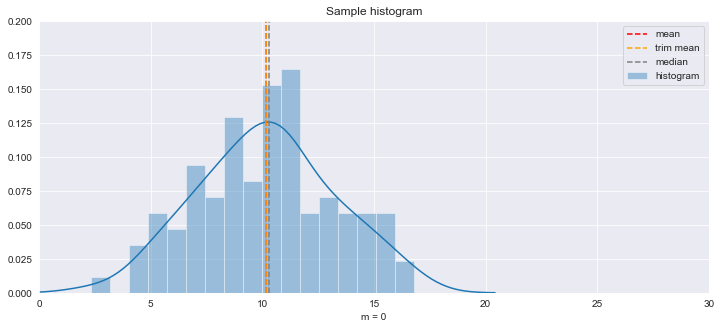

In [9]:
fig = plt.figure()
hist = plt.hist(samples_h[ms[0]])
ani = animation.FuncAnimation(fig, update_hist, len(ms), fargs=(samples_h, ))
ani.save('animation.mp4', writer=animation.writers['ffmpeg'](fps=15, metadata=dict(artist='Me'), bitrate=1800))
# HTML(ani.to_html5_video())

> Please refer:

> https://drive.google.com/open?id=17XOVoPnz9jZaBdzPPRdGLcopLjFZ-53R

# 3
Next step is to simulate two dependent data sets. We simulate two samples with a given value of the correlation coeﬃcient.

## 3.a

Let $U \sim  N(0, 1)$ and $V \sim  N(0, 1)$.

Let $U^∗ = U$ and $V^∗ = \rho U + \sqrt{1 − \rho^2} V$.

- [x]  Prove that $Corr(U^∗ , V^∗ ) = \rho$ and the variances of both variables $U^∗$ and $V^∗$ equal one.

> $Var(U^*) = Var(U) = 1$

> $Var(V^*) = Var\left(\rho U + \sqrt{1 − \rho^2} V\right) = \left\| \text{ $U$ and $V$ are independent } \right\| = \rho^2 Var(U) + (1 - \rho^2)Var(V) = \rho^2 \cdot 1 + (1 - \rho^2) \cdot 1 = 1$

> $Corr(U^*,\ V^*) = \frac{Cov(U^*,\ V^*)}{\sqrt{Var(U^*), Var(V^*)}} = Cov(U^*,\ V^*) = Cov\left(U,\ \rho U + \sqrt{1 − \rho^2} V\right) = \rho Var(U) + \sqrt{1 − \rho^2} Cov(U,  V) = \left| \text{ $U$ and $V$ are independent } \right| = \rho + \sqrt{1 − \rho^2} \cdot 0 = \rho$

## 3.b

- [x] Use the above idea to simulate two samples of size $n = 100$ from a normal distribution with diﬀerent values of $\rho$.

In [10]:
np.random.seed(0)
n = 100
delta_rho = 0.05
rhos = np.arange(0, 1 + delta_rho, delta_rho)
print('rho values are: {:.2f} {:.2f} ... {:.2f} {:.2f}'\
      .format(*rhos[:2], *rhos[-2:]))

rv_U = stats.norm(loc=0, scale=1)
rv_V = stats.norm(loc=0, scale=1)

sample_u = rv_U.rvs(size=n)
sample_v = rv_V.rvs(size=n)
print('U  ~ N(0,1) | Sample: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}...'\
      .format(*sample_u))
print('V  ~ N(0,1) | Sample: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}...'\
      .format(*sample_v))

sample_u2 = sample_u[:]
print('U* ~ N(0,1) | Sample: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}...'\
      .format(*sample_u))
# represent_distribution(sample_u2, -5, 5)

samples_v2 = {}
for rho in rhos:
    samples_v2[rho] = rho * sample_u + np.sqrt(1 - rho**2) * sample_v

# represent_distribution(sample_u, -5, 5)
# represent_distribution(sample_v, -5, 5)
# represent_distribution(samples_v2[rhos[-1]], -5, 5)
print('V* | Generated {} samples for different values of rho.'.format(len(rhos)))

rho values are: 0.00 0.05 ... 0.95 1.00
U  ~ N(0,1) | Sample: 1.76 0.40 0.98 2.24 1.87...
V  ~ N(0,1) | Sample: 1.88 -1.35 -1.27 0.97 -1.17...
U* ~ N(0,1) | Sample: 1.76 0.40 0.98 2.24 1.87...
V* | Generated 21 samples for different values of rho.


- [x] Compute the correlation coeﬃcients of Pearson and of Spearman.
- [x] Compare the correlation to the original parameter $\rho$ (for example, plot Pearson vs. $\rho$ and Spearman vs. $\rho$).

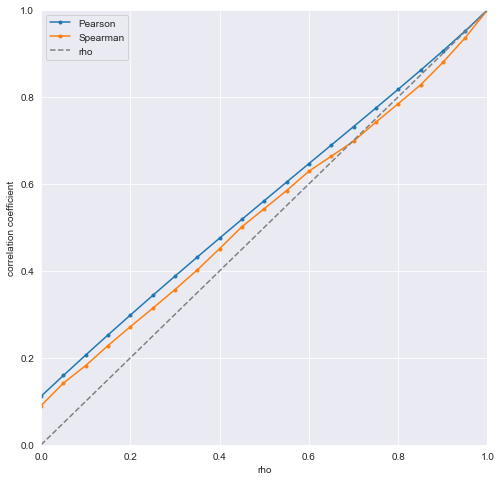

In [12]:
mpl.rcParams['figure.figsize'] = (8, 8)
corrs = {'pearson': {}, 'spearman': {}}
for rho in rhos:
    corrs['pearson'][rho] = stats.pearsonr(sample_u2, samples_v2[rho])[0]
    corrs['spearman'][rho] = stats.spearmanr(sample_u2, samples_v2[rho])[0]
plt.plot(rhos, [corrs['pearson'][rho] for rho in rhos], '.-')
plt.plot(rhos, [corrs['spearman'][rho] for rho in rhos], '.-')
plt.plot(rhos, rhos, '--', color='gray')
plt.legend(['Pearson', 'Spearman', 'rho'])
plt.axis([0, 1, 0, 1])
plt.xlabel('rho')
plt.ylabel('correlation coefficient')
plt.show()

> When rho is close to zero, which means that there is (almost) no corelation, both coefficients have higher values, which may be caused by stochasticity. The more rho is, the closer are coefficients to it. Pearson coefficient is growing linearly while Spearman is close to linear.

## 3.c

- [x] Make a nonlinear but monotone transformation of $V^∗$ , say $V^2$, $ln$ or $exp$.
> Let $V^{**} = exp(V^{*}) + 0.5 V^{*}$ - monotone transformation of $V^{*}$

In [13]:
samples_v3 = {}
for rho in rhos:
    samples_v3[rho] = np.exp(samples_v2[rho]) + 0.5 * samples_v2[rho]


- [x] Check the impact of this transformation on the correlation coeﬃcients of Spearman and Pearson.
- [x] Think about an appropriate visualization of the ﬁndings.

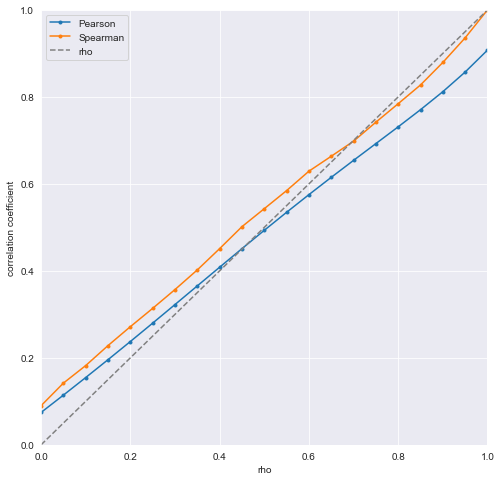

In [14]:
corrs2 = {'pearson': {}, 'spearman': {}}
for rho in rhos:
    corrs2['pearson'][rho] = stats.pearsonr(sample_u2, samples_v3[rho])[0]
    corrs2['spearman'][rho] = stats.spearmanr(sample_u2, samples_v3[rho])[0]
plt.plot(rhos, [corrs2['pearson'][rho] for rho in rhos], '.-')
plt.plot(rhos, [corrs2['spearman'][rho] for rho in rhos], '.-')
plt.plot(rhos, rhos, '--', color='gray')
plt.legend(['Pearson', 'Spearman', 'rho'])
plt.axis([0, 1, 0, 1])
plt.xlabel('rho')
plt.ylabel('correlation coefficient')
plt.show()

> If we look at the functions of correlation coeffitients with respect to $\rho$ we wouldn't conclude much but if look at the function of the correlation coefficients of the transformed V* with respect to the same coefficients of the original V*:

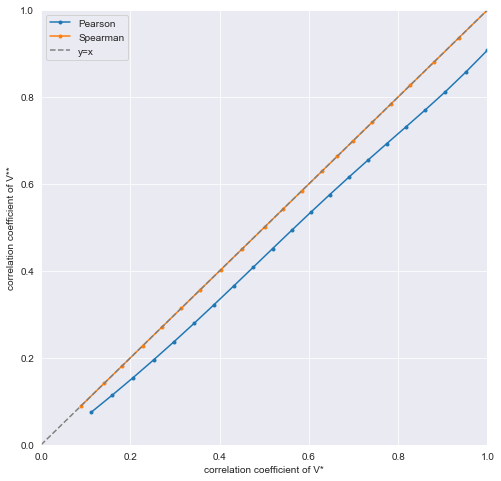

In [15]:
plt.plot([corrs['pearson'][rho] for rho in rhos], [corrs2['pearson'][rho] for rho in rhos], '.-')
plt.plot([corrs['spearman'][rho] for rho in rhos], [corrs2['spearman'][rho] for rho in rhos], '.-')
plt.plot(rhos, rhos, '--', color='gray')
plt.legend(['Pearson', 'Spearman', 'y=x'])
plt.axis([0, 1, 0, 1])
plt.xlabel('correlation coefficient of V*')
plt.ylabel('correlation coefficient of V**')
plt.show()

> We can see that the correlation coefficient of Spearman hasn't changed. Indeed, since it deals not with variable values but with its ranks, the monotone (!) transformation wouldn't affect the rank values. The coefficient of Pearson got lower since the dependence between variables is no longer linear but more complex.